# **Hands On Machine Learning**

<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=20%><br>
<p>Linear Regression Training Details</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

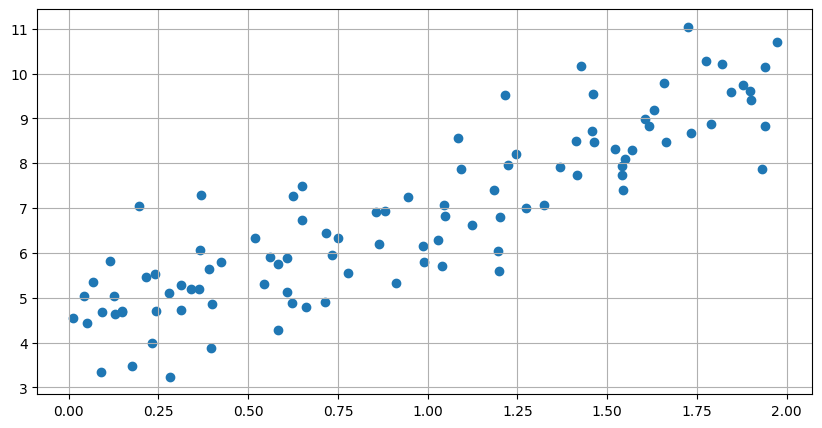

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()

In [4]:
from sklearn.preprocessing import add_dummy_feature

Xb = add_dummy_feature(X)
params = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

In [5]:
X_new = np.array([[0], [2]])
X_newb = add_dummy_feature(X_new)
y_pred = X_newb @ params
y_pred

array([[4.21509616],
       [9.75532293]])

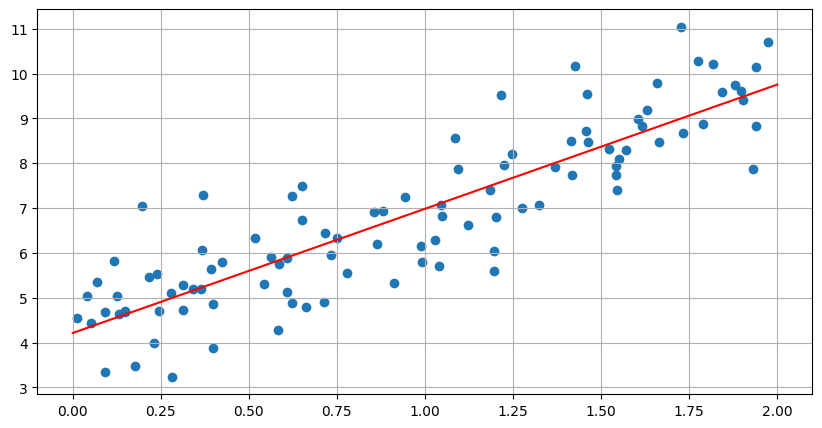

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_new, y_pred, c='red');

# **Gradient Descent types:**
- Batch GD
- Stochastic GD
- Mini-Batch GD

1. **Batch GD**

In [7]:
eta = 0.1
n_epochs = 1000
m = len(Xb)

In [8]:
np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  gradients = 2 / m * Xb.T @ (Xb @ theta - y)
  theta = theta - eta * gradients

In [9]:
theta

array([[4.21509616],
       [2.77011339]])

In [10]:
X_line = np.linspace(0, 2)
y_line = X_line * theta[0] + theta[1]

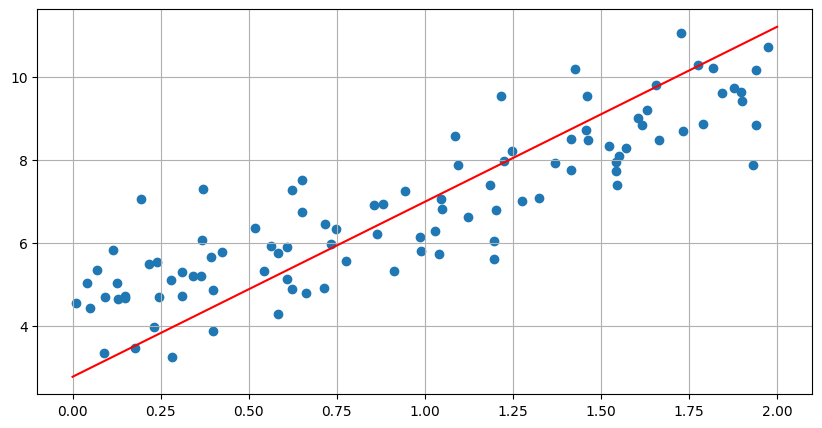

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_line, y_line, c='red');

2. **SGD**

We'll use learning schedule with this one in order to slow down changes to the end

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning scheducle hyperparameters changing lr

In [13]:
def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [14]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = Xb[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [15]:
X_line = np.linspace(0, 2)
y_line = X_line * theta[0] + theta[1]

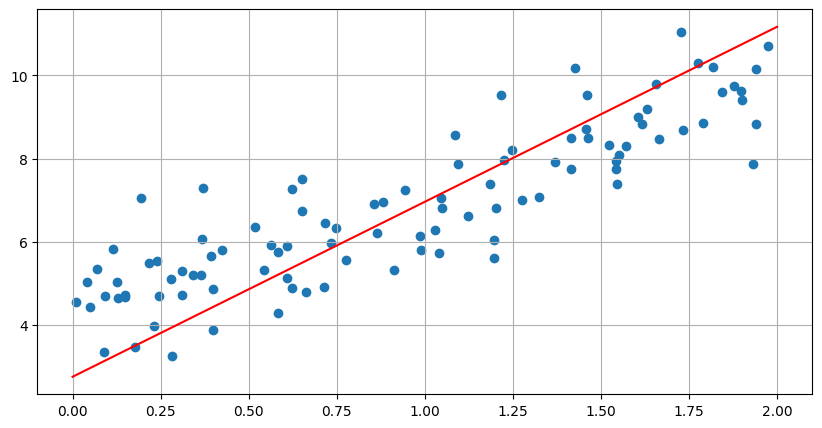

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.grid()
plt.plot(X_line, y_line, c='red');

# **POLYNOMIAL REGRESSION**

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

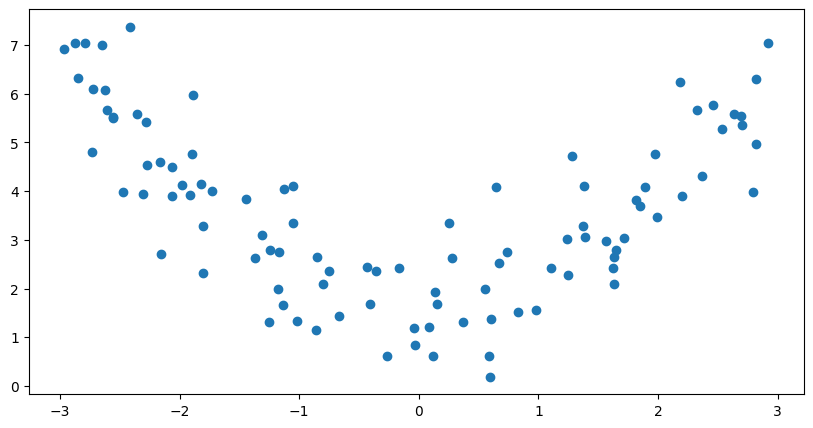

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y);

Such data can not be linearly described!

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feats.fit_transform(X)
X[0]

array([-0.75275929])

In [21]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly contains original X feature and polynomial one

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[-0.06633107,  0.56456263]]))

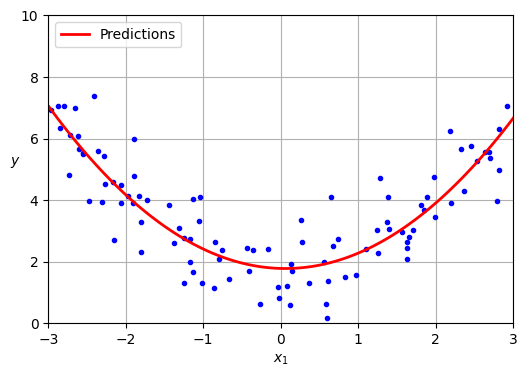

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feats.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

It works because our linear model is described with:<br>
$$\hat y = ΘX$$
or in other words:
$$\hat y = b + ∑{w_i x_i}$$
When we add 2nd feature x_2 such that:
$$x_2 = x_1^2$$ we get an equation:
$$w_2x_1^2 + w_1x_1 + b$$
which is a quadratic function:
$$ax^2 + bx + c$$

How to understand if our model overfits the data or underfits?<br>
Build a Learning Curve for it!

In [26]:
from sklearn.model_selection import learning_curve

In [27]:
train_size, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

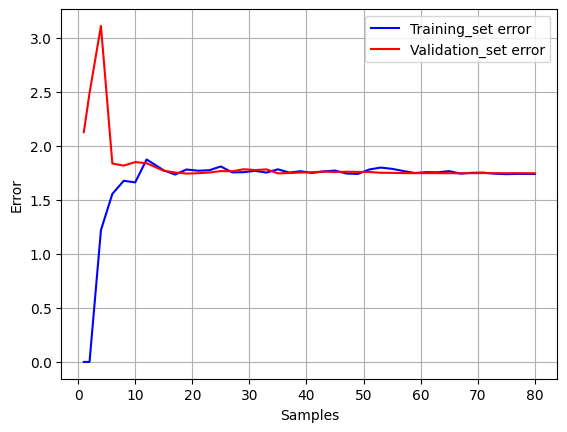

In [28]:
plt.plot(train_size, train_errs, color='blue', label='Training_set error')
plt.plot(train_size, val_errs, color='red', label='Validation_set error')
plt.grid()
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show();

### **Now let's look at the 10th degree polynomial**

In [29]:
from sklearn.pipeline import make_pipeline

In [30]:
polynomial_regr = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

In [31]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regr, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

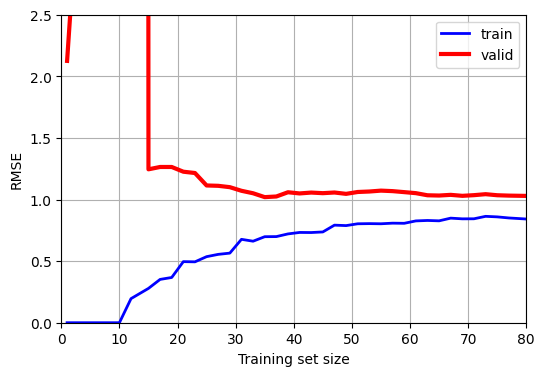

In [32]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "b", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "r", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Here this 10 degree polynomial looks to be overfitting our data as training error is lower than valid one.<br>
However size increasing could help here

In [33]:
polynomial_regr = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

In [34]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regr, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errs = -train_scores.mean(axis=1)
val_errs = -valid_scores.mean(axis=1)

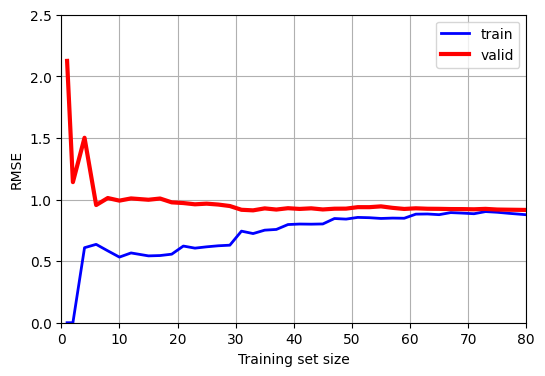

In [35]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "b", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "r", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Good!<br>
Here's no huge gap in here and it's just right!

# **REGULARIZATION**
**Ridge Regression** also known as L2 norm regularization<br>
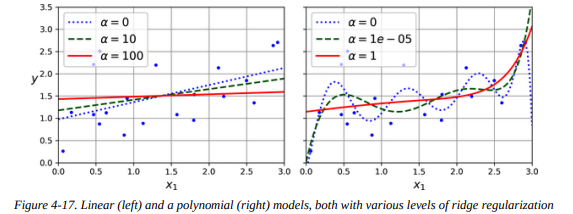

Ridge changes cost function $J$ in order to minimize MSE and keep weights as small as possible<br>
$$J(\theta) = MSE(\theta) + {a \over m} \sum_{i=1}\theta_i^2$$
Note: we don't regularize *bias*

In [36]:
from sklearn.linear_model import Ridge

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [38]:
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

Lasso Regularization

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

**We can also use SGDRegressor with regularization**

In [41]:
from sklearn.linear_model import SGDRegressor

In [42]:
sgd_reg = SGDRegressor(penalty='l1', alpha=0.1)  # lasso regularization

Elastic Net<br>
It is prefered more than LASSO because it also eliminates useless feature weights but works better

**EarlyStopping** is also used as a regularization technique

# **Logistic Regression**
Decision boundaries

In [44]:
from sklearn.datasets import load_iris

In [46]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [47]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# now let's plot our sigmoid function:

X_new = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]  # first element of linspace
# classified as iris virginica

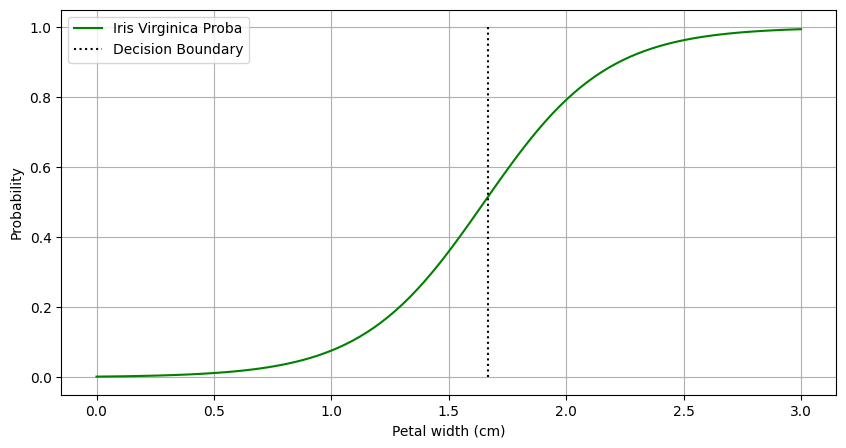

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica Proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:',
         label='Decision Boundary')
plt.grid()
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()

plt.show();

# **We found out that our decision boundary is 1.66**
So yeah... Logistic Regression finds hyperplane to split our data<br>
Nothing new.

In [61]:
decision_boundary

1.6666666666666667

In [62]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## **Softmax Regression**
Logistic Regression in Scikit learn doesn't even need to create many many binary classifiers.<br>
**Softmax function** can find probabilities for multiple k classes<br>

# **M A T H**
1. Compute a score for each class
$$s_k(x) = (θ^{(k)})^Tx$$
(simple linear function)
Note: params $θ$ are individual for each class k and stored in param matrix $Θ$
2. Estimate probability $\hat p_k$ of $s_k$ belonging to class $k$
$$\hat p_k = \sigma(s(x))_k = {exp(s_k(x)) \over ∑^k_{j=1}exp(s_j(x))}$$
We expoentiate every score normalizing it by sum of all the score exponentials
3. Make prediction

$$\hat y = argmax σ(s(x))_k = argmax ((θ^{(k)})^Tx)$$
note: argmax by k

### **Cross entropy**

$$J(Θ) = - {1 \over m} \sum^m_{i=1}\sum^K_{k=1}y_k^{(i)}log(\hat p_k^{(i)})$$